In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/lefos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
train_ds_path = '../data/atis/train.tsv'
test_ds_path = '../data/atis/test.tsv'
# Define custom headers
custom_headers = ['user_prompt', 'intents']

### Data Exploration

In [3]:
# Read the TSV file into a pandas DataFrame
train_ds = pd.read_csv(train_ds_path, sep='\t', header=None, names=custom_headers)

train_ds

,user_prompt,intents
0,i want to fly from boston at 838 am and arrive...,flight
1,what flights are available from pittsburgh to ...,flight
2,what is the arrival time in san francisco for ...,flight_time
3,cheapest airfare from tacoma to orlando,airfare
4,round trip fares from pittsburgh to philadelph...,airfare
...,...,...
4629,what is the airfare for flights from denver to...,airfare
4630,do you have any flights from denver to baltimo...,flight
4631,which airlines fly into and out of denver,airline
4632,does continental fly from boston to san franci...,flight


In [4]:
# Read the TSV file into a pandas DataFrame
test_ds = pd.read_csv(test_ds_path, sep='\t', header=None, names=custom_headers)

test_ds

,user_prompt,intents
0,i would like to find a flight from charlotte t...,flight
1,on april first i need a ticket from tacoma to ...,airfare
2,on april first i need a flight going from phoe...,flight
3,i would like a flight traveling one way from p...,flight
4,i would like a flight from orlando to salt lak...,flight
...,...,...
845,please find all the flights from cincinnati to...,flight
846,find me a flight from cincinnati to any airpor...,flight
847,i 'd like to fly from miami to chicago on amer...,flight
848,i would like to book a round trip flight from ...,flight


In [5]:
# create list of intents per user prompt
train_ds['intent_list'] = train_ds['intents'].str.split('+')
train_ds

test_ds['intent_list'] = test_ds['intents'].str.split('+')
test_ds



,user_prompt,intents,intent_list
0,i would like to find a flight from charlotte t...,flight,[flight]
1,on april first i need a ticket from tacoma to ...,airfare,[airfare]
2,on april first i need a flight going from phoe...,flight,[flight]
3,i would like a flight traveling one way from p...,flight,[flight]
4,i would like a flight from orlando to salt lak...,flight,[flight]
...,...,...,...
845,please find all the flights from cincinnati to...,flight,[flight]
846,find me a flight from cincinnati to any airpor...,flight,[flight]
847,i 'd like to fly from miami to chicago on amer...,flight,[flight]
848,i would like to book a round trip flight from ...,flight,[flight]


In [6]:
# size of valid labels per prompt 
train_ds['intent_count'] = train_ds['intent_list'].apply(len)
train_ds

test_ds['intent_count'] = test_ds['intent_list'].apply(len)
test_ds

,user_prompt,intents,intent_list,intent_count
0,i would like to find a flight from charlotte t...,flight,[flight],1
1,on april first i need a ticket from tacoma to ...,airfare,[airfare],1
2,on april first i need a flight going from phoe...,flight,[flight],1
3,i would like a flight traveling one way from p...,flight,[flight],1
4,i would like a flight from orlando to salt lak...,flight,[flight],1
...,...,...,...,...
845,please find all the flights from cincinnati to...,flight,[flight],1
846,find me a flight from cincinnati to any airpor...,flight,[flight],1
847,i 'd like to fly from miami to chicago on amer...,flight,[flight],1
848,i would like to book a round trip flight from ...,flight,[flight],1


In [7]:
# Splitting the data into two categories: lengths greater than 1 and equal to 1
greater_than_1 = train_ds[train_ds['intent_count'] > 1].shape[0]
equal_to_1 = train_ds[train_ds['intent_count'] == 1]['intent_count'].shape[0]
print('greater_than_1', greater_than_1)
print('equal_to_1', equal_to_1)

greater_than_1 22
equal_to_1 4612


In [8]:
# % prc of multiple label training data
(greater_than_1  / (greater_than_1+equal_to_1)) * 100

0.4747518342684506

In [9]:
# save training examples with multiple valid labels
train_ds[train_ds['intent_count'] > 1].to_csv('../data/atis/train_multiple_intents.csv', index=False)

# save training examples with multiple valid labels
test_ds[test_ds['intent_count'] > 1].to_csv('../data/atis/test_multiple_intents.csv', index=False)

In [6]:
# unique intents 
train_ds['intents'].unique()

array(['flight', 'flight_time', 'airfare', 'aircraft', 'ground_service',
       'airport', 'airline', 'distance', 'abbreviation', 'ground_fare',
       'quantity', 'city', 'flight_no', 'capacity', 'flight+airfare',
       'meal', 'restriction', 'airline+flight_no',
       'ground_service+ground_fare', 'airfare+flight_time', 'cheapest',
       'aircraft+flight+flight_no'], dtype=object)

In [7]:
# unique intents 
test_ds['intents'].unique()

array(['flight', 'airfare', 'flight+airfare', 'ground_service',
       'day_name', 'meal', 'airport', 'airline', 'flight_time', 'city',
       'ground_fare', 'quantity', 'abbreviation', 'distance', 'aircraft',
       'airfare+flight', 'capacity', 'flight+airline',
       'flight_no+airline', 'flight_no'], dtype=object)

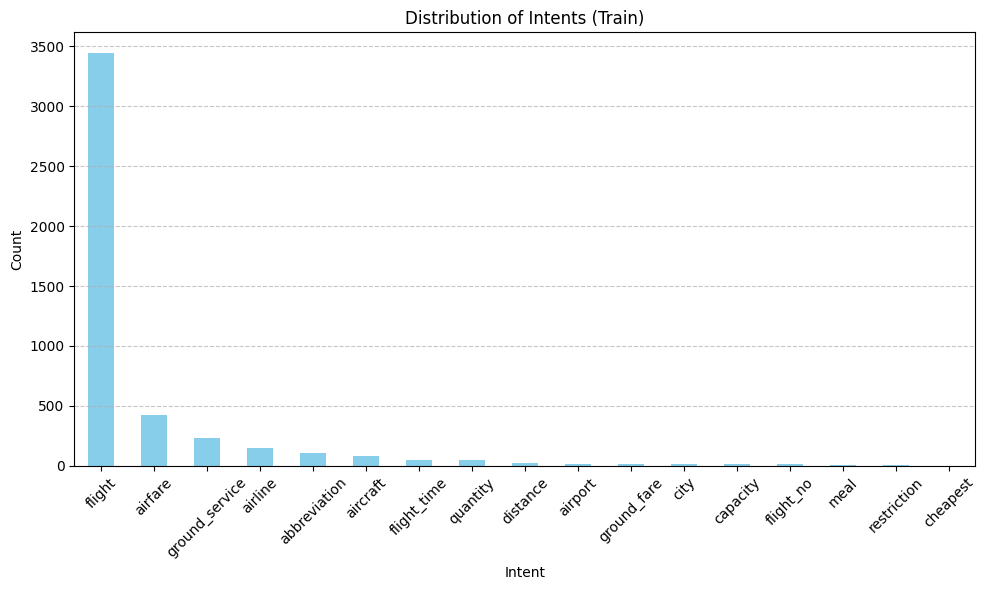

In [8]:
# visualize the distribution  of intents

# Flatten the 'intent_list' column to get a list of all intents
all_intents_train = [intent for sublist in train_ds['intent_list'] for intent in sublist]

# Count the occurrences of each intent
intent_counts = pd.Series(all_intents_train).value_counts()

# Plot the distribution of intents
plt.figure(figsize=(10, 6))
intent_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Intents (Train)')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
len(all_intents_train)

4657

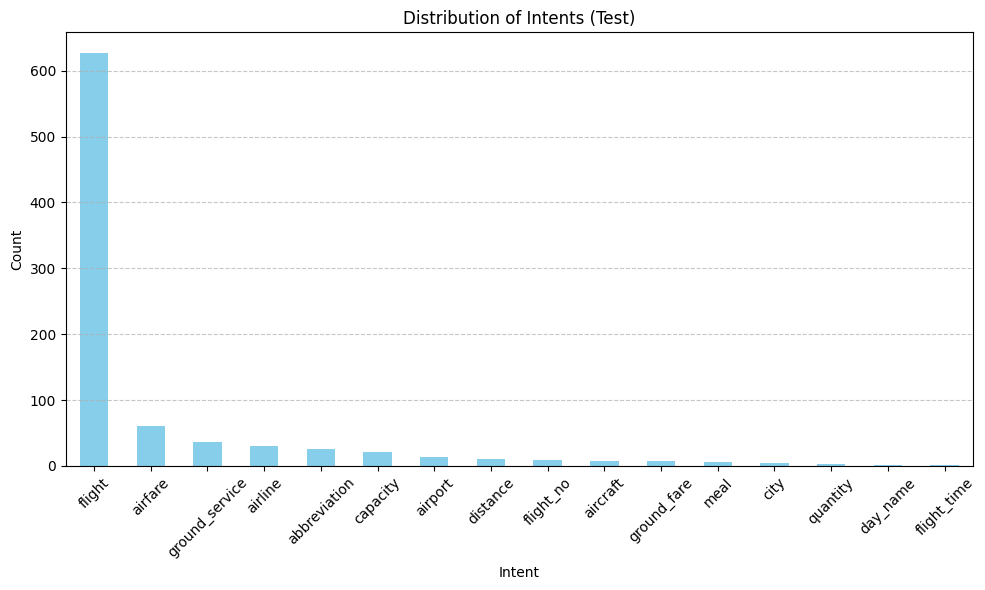

In [10]:
# visualize the distribution  of intents

# Flatten the 'intent_list' column to get a list of all intents
all_intents_test = [intent for sublist in test_ds['intent_list'] for intent in sublist]

# Count the occurrences of each intent
intent_counts = pd.Series(all_intents_test).value_counts()

# Plot the distribution of intents
plt.figure(figsize=(10, 6))
intent_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Intents (Test)')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
# missing intents from test
set(all_intents_train) - set(all_intents_test)

{'cheapest', 'restriction'}

In [12]:
# missing intents from test
set(train_ds['intents']) - set(test_ds['intents'])

{'aircraft+flight+flight_no',
 'airfare+flight_time',
 'airline+flight_no',
 'cheapest',
 'ground_service+ground_fare',
 'restriction'}

In [12]:
# missing intents from train
set(all_intents_test) - set(all_intents_train)

{'day_name'}

In [14]:
len(set(all_intents_test))

16

In [16]:
len(set(all_intents_train))

17

In [13]:
# missing intents from test
set(test_ds['intents']) - set(train_ds['intents'])

{'airfare+flight', 'day_name', 'flight+airline', 'flight_no+airline'}

In [13]:
# investigate low frequency intents
train_ds[train_ds['intents'] == 'cheapest']

,user_prompt,intents,intent_list
3268,show me the cheapest fare in the database,cheapest,[cheapest]


In [15]:
# count number of words (tokens) per user prompt
train_ds['num_words'] = train_ds['user_prompt'].apply(lambda x: len(x.split()))
print('average words per prompt: ', round(train_ds['num_words'].mean(), 0))
print('max words prompt: ', train_ds['num_words'].max())
train_ds


average words per prompt:  12.0
max words prompt:  46


,user_prompt,intents,intent_list,num_words
0,i want to fly from boston at 838 am and arrive...,flight,[flight],18
1,what flights are available from pittsburgh to ...,flight,[flight],11
2,what is the arrival time in san francisco for ...,flight_time,[flight_time],15
3,cheapest airfare from tacoma to orlando,airfare,[airfare],6
4,round trip fares from pittsburgh to philadelph...,airfare,[airfare],10
...,...,...,...,...
4629,what is the airfare for flights from denver to...,airfare,[airfare],13
4630,do you have any flights from denver to baltimo...,flight,[flight],11
4631,which airlines fly into and out of denver,airline,[airline],8
4632,does continental fly from boston to san franci...,flight,[flight],13


In [10]:
# count number of characters (tokens) per user prompt
train_ds['num_characters'] = train_ds['user_prompt'].apply(len)

# Calculate minimum, maximum, and mean number of characters
min_characters = train_ds['num_characters'].min()
max_characters = train_ds['num_characters'].max()
mean_characters = train_ds['num_characters'].mean()

# Print the results
print('Minimum number of characters:', min_characters)
print('Maximum number of characters:', max_characters)
print('Mean number of characters:', mean_characters)

Minimum number of characters: 6
Maximum number of characters: 259
Mean number of characters: 65.07250755287009


In [11]:
## remove stop words using nltk


# Tokenize the user_prompt column
train_ds['user_prompt_tokenized'] = train_ds['user_prompt'].apply(nltk.word_tokenize)

# Remove stop words from the user_prompt column
stop_words = set(stopwords.words('english'))
train_ds['user_prompt_tokenized'] = train_ds['user_prompt_tokenized'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Join the words back into sentences
train_ds['user_prompt_wo_stopwords'] = train_ds['user_prompt_tokenized'].apply(lambda x: ' '.join(x))
train_ds


,user_prompt,intents,intent_list,intent_count,num_characters,user_prompt_tokenized,user_prompt_wo_stopwords
0,i want to fly from boston at 838 am and arrive...,flight,[flight],1,79,"[want, fly, boston, 838, arrive, denver, 1110,...",want fly boston 838 arrive denver 1110 morning
1,what flights are available from pittsburgh to ...,flight,[flight],1,75,"[flights, available, pittsburgh, baltimore, th...",flights available pittsburgh baltimore thursda...
2,what is the arrival time in san francisco for ...,flight_time,[flight_time],1,82,"[arrival, time, san, francisco, 755, flight, l...",arrival time san francisco 755 flight leaving ...
3,cheapest airfare from tacoma to orlando,airfare,[airfare],1,39,"[cheapest, airfare, tacoma, orlando]",cheapest airfare tacoma orlando
4,round trip fares from pittsburgh to philadelph...,airfare,[airfare],1,67,"[round, trip, fares, pittsburgh, philadelphia,...",round trip fares pittsburgh philadelphia 1000 ...
...,...,...,...,...,...,...,...
4629,what is the airfare for flights from denver to...,airfare,[airfare],1,74,"[airfare, flights, denver, pittsburgh, delta, ...",airfare flights denver pittsburgh delta airline
4630,do you have any flights from denver to baltimo...,flight,[flight],1,59,"[flights, denver, baltimore, via, dallas]",flights denver baltimore via dallas
4631,which airlines fly into and out of denver,airline,[airline],1,41,"[airlines, fly, denver]",airlines fly denver
4632,does continental fly from boston to san franci...,flight,[flight],1,71,"[continental, fly, boston, san, francisco, sto...",continental fly boston san francisco stop denver


In [17]:
# count number of words (tokens) per user prompt
train_ds['num_words_wo_stopwords'] = train_ds['user_prompt_wo_stopwords'].apply(lambda x: len(x.split()))
print('average words per prompt (wo stopwords): ', round(train_ds['num_words_wo_stopwords'].mean(), 0))
print('max words prompt: ', train_ds['num_words_wo_stopwords'].max())
train_ds

average words per prompt (wo stopwords):  7.0
max words prompt:  30


,user_prompt,intents,intent_list,num_words,user_prompt_tokenized,user_prompt_wo_stopwords,num_words_wo_stopwords
0,i want to fly from boston at 838 am and arrive...,flight,[flight],18,"[want, fly, boston, 838, arrive, denver, 1110,...",want fly boston 838 arrive denver 1110 morning,8
1,what flights are available from pittsburgh to ...,flight,[flight],11,"[flights, available, pittsburgh, baltimore, th...",flights available pittsburgh baltimore thursda...,6
2,what is the arrival time in san francisco for ...,flight_time,[flight_time],15,"[arrival, time, san, francisco, 755, flight, l...",arrival time san francisco 755 flight leaving ...,8
3,cheapest airfare from tacoma to orlando,airfare,[airfare],6,"[cheapest, airfare, tacoma, orlando]",cheapest airfare tacoma orlando,4
4,round trip fares from pittsburgh to philadelph...,airfare,[airfare],10,"[round, trip, fares, pittsburgh, philadelphia,...",round trip fares pittsburgh philadelphia 1000 ...,7
...,...,...,...,...,...,...,...
4629,what is the airfare for flights from denver to...,airfare,[airfare],13,"[airfare, flights, denver, pittsburgh, delta, ...",airfare flights denver pittsburgh delta airline,6
4630,do you have any flights from denver to baltimo...,flight,[flight],11,"[flights, denver, baltimore, via, dallas]",flights denver baltimore via dallas,5
4631,which airlines fly into and out of denver,airline,[airline],8,"[airlines, fly, denver]",airlines fly denver,3
4632,does continental fly from boston to san franci...,flight,[flight],13,"[continental, fly, boston, san, francisco, sto...",continental fly boston san francisco stop denver,7


In [18]:
## calculate  total reduction in words (tokens)

print('total words before removing stopwords: ', train_ds['num_words'].sum())
print('total words after removing stopwords: ', train_ds['num_words_wo_stopwords'].sum())
print('PRC Reduction in total words (tokens): ', ((train_ds['num_words_wo_stopwords'].sum()- train_ds['num_words'].sum())/train_ds['num_words'].sum())*100 )

total words before removing stopwords:  53679
total words after removing stopwords:  30833
PRC Reduction in total words (tokens):  -42.560405372678325


In [19]:
## explore most frequent words 

# Flatten the tokenized lists into a single list of words
flat_words = [word for sublist in train_ds['user_prompt_tokenized'] for word in sublist]

# Count the frequency of each word
word_freq = FreqDist(flat_words)

# Sort the words based on their frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Convert the result into a pandas DataFrame
word_freq_df = pd.DataFrame(sorted_word_freq, columns=['Word', 'Frequency'])

# Display the most frequent words
word_freq_df.head(20)

,Word,Frequency
0,flights,2237
1,flight,1139
2,boston,1009
3,san,963
4,show,932
5,denver,930
6,francisco,831
7,atlanta,718
8,pittsburgh,634
9,dallas,623
